In [92]:
# utilities
import pandas as pd 
import numpy as np
from datetime import datetime as dt

# plots
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

# autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#model

Importing datasets

In [65]:
co2 = pd.read_csv('co2-avg_montly.csv')
co2_cols = ['Decimal Date','Trend']
co2 = co2.drop(co2_cols,axis=1)

no_raindays = pd.read_csv('rainfall-monthly-number-of-rain-days.csv')
no_raindays.rename(columns={'month':'Date'},inplace=True)

sea_level = pd.read_csv('avg_sea_level.csv')
sea_cols = ['Uncertanty']
sea_level = sea_level.drop(sea_cols,axis=1)
sea_level.rename(columns = {'Time':'Date'},inplace=True)

humidity = pd.read_csv('relative-humidity-monthly-mean.csv')
humidity.rename(columns = {'month':'Date'},inplace=True)

rainfall = pd.read_csv('rainfall-monthly-total.csv')
rainfall.rename(columns = {'month':'Date'},inplace=True)

temperature = pd.read_csv('surface-air-temperature-monthly-mean.csv')
temperature.rename(columns = {'month':'Date'},inplace=True)

anomaly_temperature = pd.read_csv('anomalies_temp.csv')
anomaly_temperature.drop(anomaly_temperature[anomaly_temperature['Source'] == 'GCAG'].index, inplace = True)
anomaly_cols = ['Source']
anomaly_temperature = anomaly_temperature.drop(anomaly_cols,axis=1)

Change datatype of the column with the date into the dame datetime format 'YYYY-mm'

In [68]:
co2['Date'] = pd.to_datetime(co2['Date'], format = '%Y-%m')
co2['Date'] = co2['Date'].dt.strftime('%Y-%m')

sea_level['Date'] = pd.to_datetime(sea_level['Date'], format = '%Y-%m')
sea_level['Date'] = sea_level['Date'].dt.strftime('%Y-%m')

humidity['Date'] = pd.to_datetime(humidity['Date'], format = '%Y-%m')
humidity['Date'] = humidity['Date'].dt.strftime('%Y-%m')

rainfall['Date'] = pd.to_datetime(humidity['Date'], format = '%Y-%m')
rainfall['Date'] = rainfall['Date'].dt.strftime('%Y-%m')

temperature['Date'] = pd.to_datetime(temperature['Date'], format = '%Y-%m')
temperature['Date'] = temperature['Date'].dt.strftime('%Y-%m')

anomaly_temperature['Date'] = pd.to_datetime(anomaly_temperature['Date'], format = '%Y-%m')
anomaly_temperature['Date'] = anomaly_temperature['Date'].dt.strftime('%Y-%m')


Now that the dataframes are modified and the cols have the same name and format, i can merge them on the Date and build a unique dataframe

In [70]:
climate_change = co2.merge(no_raindays,on='Date').merge(sea_level,on='Date').merge(humidity,on='Date').merge(rainfall,on='Date').merge(temperature,on='Date').merge(anomaly_temperature,on='Date')

In [72]:
climate_change.head()

,Date,co2,no_of_rainy_days,GMSL(Global Mean Sea Level),relative_humidity,total_rainfall,surface_temp,Anomalies_Land_Ocean_Temperature
0,1982-01,341.27,10,-8.2,81.2,107.1,25.9,0.09
1,1982-02,341.86,5,-9.3,79.5,27.8,27.1,0.14
2,1982-03,342.14,11,-10.6,82.3,160.8,27.2,-0.01
3,1982-04,342.42,14,-13.1,85.9,157.0,27.0,0.10
4,1982-05,342.27,10,-13.5,83.2,102.2,28.0,0.16


In [75]:
# change the column values from percentage to decimal 
climate_change['relative_humidity'] = climate_change['relative_humidity'].apply(lambda x: x / 100)

In [ ]:
# add values until 2020?


In [79]:
#save the dataframe to csv
climate_change.to_csv('climate_change.csv',index=False)

DATA VISUALIZATION

In [86]:
climate_change.corr()

,co2,no_of_rainy_days,GMSL(Global Mean Sea Level),relative_humidity,total_rainfall,surface_temp,Anomalies_Land_Ocean_Temperature
co2,1.000000,0.168895,0.959437,0.063673,0.095167,0.220361,0.759529
no_of_rainy_days,0.168895,1.000000,0.147728,0.744496,0.710709,-0.406689,0.021972
GMSL(Global Mean Sea Level),0.959437,0.147728,1.000000,0.003408,0.054906,0.236321,0.715655
relative_humidity,0.063673,0.744496,0.003408,1.000000,0.689661,-0.644677,-0.036892
total_rainfall,0.095167,0.710709,0.054906,0.689661,1.000000,-0.519534,0.050089
surface_temp,0.220361,-0.406689,0.236321,-0.644677,-0.519534,1.000000,0.284805
Anomalies_Land_Ocean_Temperature,0.759529,0.021972,0.715655,-0.036892,0.050089,0.284805,1.000000


In [88]:
def correlation(data : pd.core.frame.DataFrame):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix) #to plot only a half matrix
    mask[np.triu_indices_from(mask)] = True #to generate a mask for the upper triangle
    sns.heatmap(corr_matrix, mask=mask, square=True,cmap="PuOr_r")
    return

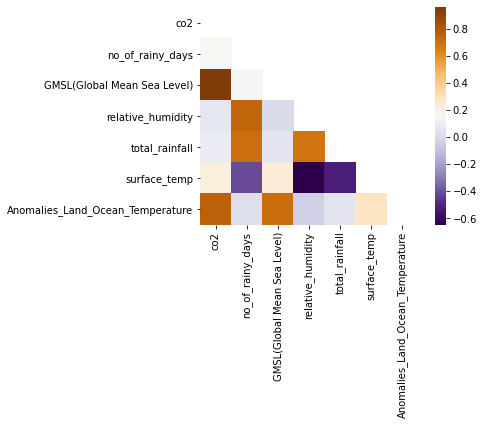

In [89]:
correlation(climate_change)

In [ ]:
values = ['co2','no_of_rainy_days','GMSL(Global Mean Sea Level)','relative_humidity','total_rainfall',
            'surface_temp','Anomalies_Land_Ocean_Temperature']

Autocorrelation

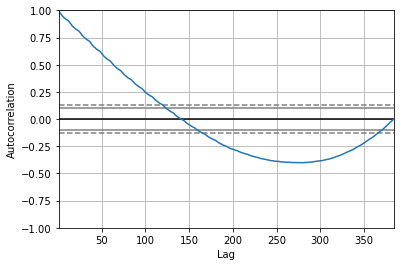

In [90]:
pd.plotting.autocorrelation_plot(climate_change['co2'])
plt.show()

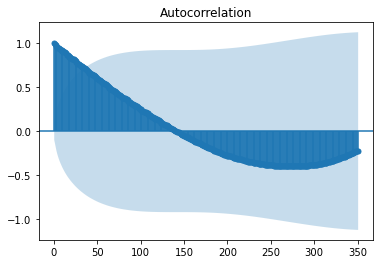

In [99]:
plot_acf(climate_change['co2'], lags=350)
plt.show()

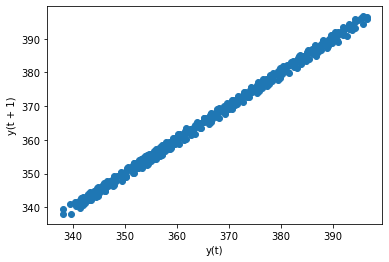

In [91]:
pd.plotting.lag_plot(climate_change['co2'])
plt.show()

Partial autocorrelation

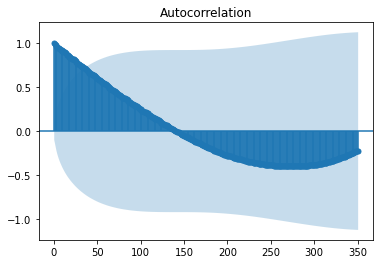

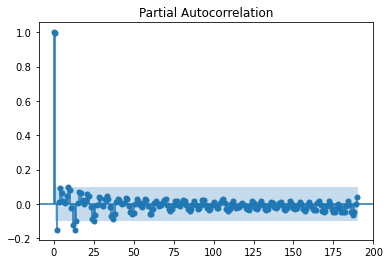

In [98]:
plot_pacf(climate_change['co2'], lags=190)
plt.show()